# Feature Engineering

Feature Engineering makes the data more easy to understand for a model.

**simple example:**

* children: survive
* old people: survive
* middle aged: dead

**Problem:** LogReg cannot place two boundaries into one feature.

    1 1 1 1  O O O O 1 1 1 1

**solution: split the data to multiple features**

* child: `1 1 1 1`
* middle: `0 0 0 0`
* old: `1 1 1 1`

## Exploratory Analysis

### Step 1

Read the *data* into Python and print a few rows.

In [10]:
import seaborn as sns
%matplotlib inline

df = sns.load_dataset('titanic')

In [17]:
# cut extra columns
df = df.iloc[:, :8]

In [19]:
df.shape

(891, 8)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
survived    891 non-null int64
pclass      891 non-null int64
sex         891 non-null object
age         714 non-null float64
sibsp       891 non-null int64
parch       891 non-null int64
fare        891 non-null float64
embarked    889 non-null object
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [18]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


### Step 2

Calculate the number of surviving/non-surviving passengers and display it as a bar plot.

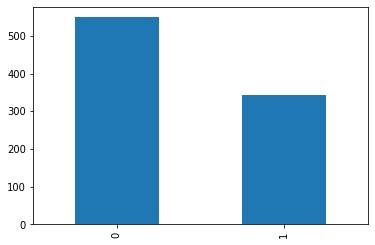

In [36]:
df['survived'].value_counts().plot.bar()

In [41]:
df.groupby('survived').size()

survived
0    549
1    342
dtype: int64

In [40]:
df.groupby('survived')[['pclass']].count()

,pclass
survived,
0,549
1,342


In [57]:
# without method chaining
counts = df.groupby(['survived', 'pclass'])['sex'].count()
counts.unstack(1)

pclass,1,2,3
survived,,,
0,80,97,372
1,136,87,119


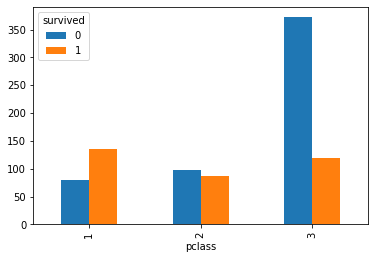

In [48]:
# with method chaining
df.groupby(['survived', 'pclass'])[['sex']].count().unstack(0)['sex'].plot.bar()

### Step 3

Calculate the proportion of surviving 1st class passengers with regards to the total number of 1st class passengers.

In [66]:
first = df.groupby(['survived', 'pclass'])['pclass'].count().unstack()[1]
round(first[1] / first.sum(), 3)

0.63

### Step 4

Create a bar plot with separate bars for male/female passengers and 1st/2nd/3rd class passengers.

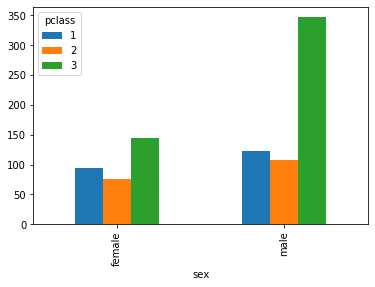

In [67]:
df.groupby(['sex', 'pclass'])['pclass'].count().unstack().plot.bar()

### Step 5

Create a histogram showing the age distribution of passengers. Compare surviving/non-surviving passengers.

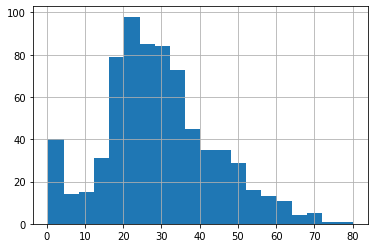

In [73]:
df['age'].hist(bins=20)

Text(0.5, 1.0, 'dead')

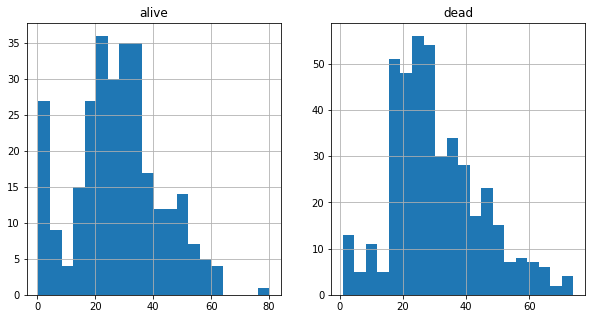

In [94]:
from matplotlib import pyplot as plt

plt.figure(figsize=(10,5))  # size in inches

# subplot(a,b,c) : I want a rows and b columns, and the c-th plot from that
plt.subplot(1, 2, 1)  
age_surviving = df[df['survived'] == 1]['age']
age_surviving.hist(bins=20)
plt.title('alive')

plt.subplot(1, 2, 2)
age_dead = df[df['survived'] == 0]['age']
age_dead.hist(bins=20)
plt.title('dead')

### Step 6

Calculate the average age for survived and drowned passengers separately.

In [103]:
age_dead.mean(), age_surviving.mean()

(30.62617924528302, 28.343689655172415)

In [102]:
df.groupby('survived')['age'].describe()  # .mean()

,count,mean,std,min,25%,50%,75%,max
survived,,,,,,,,
0,424.0,30.626179,14.172110,1.00,21.0,28.0,39.0,74.0
1,290.0,28.343690,14.950952,0.42,19.0,28.0,36.0,80.0


### Step 7

Replace missing age values by the mean age.

In [105]:
df['age_fixed'] = df['age'].fillna(df['age'].mean())

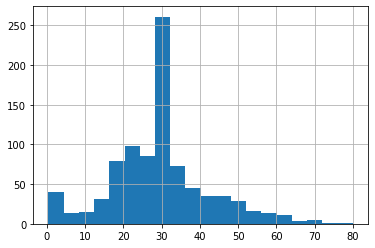

In [106]:
df['age_fixed'].hist(bins=20)

### Step 8

Create a table counting the number of surviving/dead passengers separately for 1st/2nd/3rd class and male/female.

In [112]:
s = df.groupby(['survived', 'pclass', 'sex']).size()
type(s)

pandas.core.series.Series

In [114]:
s

survived  pclass  sex   
0         1       female      3
                  male       77
          2       female      6
                  male       91
          3       female     72
                  male      300
1         1       female     91
                  male       45
          2       female     70
                  male       17
          3       female     72
                  male       47
dtype: int64

In [113]:
s.values

array([  3,  77,   6,  91,  72, 300,  91,  45,  70,  17,  72,  47])

In [117]:
s.index

MultiIndex([(0, 1, 'female'),
            (0, 1,   'male'),
            (0, 2, 'female'),
            (0, 2,   'male'),
            (0, 3, 'female'),
            (0, 3,   'male'),
            (1, 1, 'female'),
            (1, 1,   'male'),
            (1, 2, 'female'),
            (1, 2,   'male'),
            (1, 3, 'female'),
            (1, 3,   'male')],
           names=['survived', 'pclass', 'sex'])

In [118]:
s.index.levels[2]

Index(['female', 'male'], dtype='object', name='sex')

## Feature Engineering Techniques

### One-Hot Encoding

**Problem:** you have a categorical feature

**Solution:** convert to multiple binary columns

* results in multiple columns/features (--> multiple model parameters)
* results in binary types
* works for 100s of categories

In [124]:
import pandas as pd

onehot = pd.get_dummies(df['embarked'])
df2 = pd.concat([df, onehot], axis=1)  # <-- glues two dfs together horizontally
df2.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,age_fixed,C,Q,S
0,0,3,male,22.0,1,0,7.2500,S,22.0,0,0,1
1,1,1,female,38.0,1,0,71.2833,C,38.0,1,0,0
2,1,3,female,26.0,0,0,7.9250,S,26.0,0,0,1
3,1,1,female,35.0,1,0,53.1000,S,35.0,0,0,1
4,0,3,male,35.0,0,0,8.0500,S,35.0,0,0,1


### Alternative: Factorization

* results in a single column (--> one model parameter)
* results in an ordinal type

In [125]:
df['embarked'].replace({'C': 1, 'Q': 2, 'S': 3})

0      3.0
1      1.0
2      3.0
3      3.0
4      3.0
      ... 
886    3.0
887    3.0
888    3.0
889    1.0
890    2.0
Name: embarked, Length: 891, dtype: float64

In [ ]:
X = df2[['pclass', 'C', 'Q', 'S', 'age']]

### Target Encoding

Replace a category by its mean target (y)

Alternative to One-Hot encoding that results in only one new feature.

In [135]:
means = df.groupby('sex')['survived'].mean()
means.to_dict()

{'female': 0.7420382165605095, 'male': 0.18890814558058924}

In [131]:
df2['sex_target_enc'] = df['sex'].replace(means.to_dict())
df2.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,age_fixed,C,Q,S,sex_target_enc
0,0,3,male,22.0,1,0,7.2500,S,22.0,0,0,1,0.188908
1,1,1,female,38.0,1,0,71.2833,C,38.0,1,0,0,0.742038
2,1,3,female,26.0,0,0,7.9250,S,26.0,0,0,1,0.742038
3,1,1,female,35.0,1,0,53.1000,S,35.0,0,0,1,0.742038
4,0,3,male,35.0,0,0,8.0500,S,35.0,0,0,1,0.188908


### Binning

take a numerical column and convert it to multiple (one-hot-encoded) categories

* adds more detail to a numerical column

In [144]:
# manual splitting of age
df2['child'] = (df['age'] < 14).astype(int)

In [148]:
bins = pd.cut(df['age'], bins=4)  # creates 4 equally wide buckets
bins = pd.get_dummies(bins)       # creates 4 one-hot-encoded features
bins.head(3)

age,"(0.34, 20.315]","(20.315, 40.21]","(40.21, 60.105]","(60.105, 80.0]"
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0


In [151]:
# quantile bins
qbins = pd.qcut(df['age'], q=4)   # 4 buckets having the same number of passengers

### Scaling

convert a numerical column so that it has a defined minimum and maximum

In [155]:
# min-max scaling: min=0.0, max=1.0
# subtract the minimum, divide by range
df['age_scaled'] = (df['age'] - df['age'].min()) / (df['age'].max() - df['age'].min())

In [159]:
df['age_scaled'].describe()

count    714.000000
mean       0.367921
std        0.182540
min        0.000000
25%        0.247612
50%        0.346569
75%        0.472229
max        1.000000
Name: age_scaled, dtype: float64

**Hint: There is a good way to do this using a scikit function!**

### Interaction Terms

Multiply two features.

**Very high level of detail, potentially powerful**

In [164]:
df2['pclass*C'] = df2['pclass'] * df2['C']  # pclass but only for C, S+Q are zero

In [165]:
df2.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,age_fixed,C,Q,S,sex_target_enc,child,pclass*C
0,0,3,male,22.0,1,0,7.2500,S,22.0,0,0,1,0.188908,0,0
1,1,1,female,38.0,1,0,71.2833,C,38.0,1,0,0,0.742038,0,1
2,1,3,female,26.0,0,0,7.9250,S,26.0,0,0,1,0.742038,0,0
3,1,1,female,35.0,1,0,53.1000,S,35.0,0,0,1,0.742038,0,0
4,0,3,male,35.0,0,0,8.0500,S,35.0,0,0,1,0.188908,0,0


### Strategy

* select some of your engineered columns (or all)
* train the model
* look at the accuracy
* repeat, and see whether the accuracy goes up